# Project: Wrangling and Analyze Data

## Data Gathering

importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
archive=pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. download the tweet image prediction (image_predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
image=pd.read_csv('image-predictions.tsv',delimiter="\t")
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()

with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:

with open('tweet-json.txt')as json_file:
    data = [json.loads(line) for line in open('tweet-json.txt','r')]


### Create pandas df from the resulting data
api = pd.DataFrame(data)
api=api[[ 'id', 'favorite_count', 'retweet_count', 'created_at', 'source', 'retweeted_status']]
api.rename(columns = {'id':'tweet_id'}, inplace = True)
api.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN


## Assessing Data


In [5]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
api

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
5,891087950875897856,20562,3261,Sat Jul 29 00:08:17 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
6,890971913173991426,12041,2158,Fri Jul 28 16:27:12 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
7,890729181411237888,56848,16716,Fri Jul 28 00:22:40 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
8,890609185150312448,28226,4429,Thu Jul 27 16:25:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN
9,890240255349198849,32467,7711,Wed Jul 26 15:59:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",NaN


In [7]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1943,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,12,10,None,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
832,768596291618299904,NaN,NaN,2016-08-24 23:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oakley and Charlie. They're convi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768596291...,12,10,Oakley,None,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None


In [9]:
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
107,667873844930215936,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,1,common_iguana,0.999647,False,frilled_lizard,0.000181,False,African_chameleon,0.000128,False


In [10]:
api.sample(5)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
1380,700864154249383937,2828,685,Sat Feb 20 02:06:50 +0000 2016,"<a href=""http://twitter.com/download/iphone"" r...",NaN
94,873697596434513921,0,12518,Sun Jun 11 00:25:14 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",{'created_at': 'Sun May 28 17:23:24 +0000 2017...
1502,691820333922455552,4329,1860,Tue Jan 26 03:09:55 +0000 2016,"<a href=""http://twitter.com/download/iphone"" r...",NaN
1456,695074328191332352,3116,1239,Thu Feb 04 02:40:08 +0000 2016,"<a href=""http://twitter.com/download/iphone"" r...",NaN
1426,697616773278015490,3467,1144,Thu Feb 11 03:02:54 +0000 2016,"<a href=""http://twitter.com/download/iphone"" r...",NaN


In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id            2354 non-null int64
favorite_count      2354 non-null int64
retweet_count       2354 non-null int64
created_at          2354 non-null object
source              2354 non-null object
retweeted_status    179 non-null object
dtypes: int64(3), object(3)
memory usage: 110.4+ KB


In [14]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
api.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [16]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
len(archive[archive.tweet_id.duplicated()])

0

In [18]:
len(image[image.tweet_id.duplicated()])

0

In [19]:
len(image[image.jpg_url.duplicated()])

66

In [20]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
Toby          7
an            7
Buddy         7
Daisy         7
Stanley       6
Milo          6
Bella         6
Scout         6
Koda          6
Rusty         6
Oscar         6
Jack          6
Jax           6
Dave          6
Leo           6
Phil          5
           ... 
Severus       1
Vince         1
Tiger         1
Orion         1
Toffee        1
Henry         1
Bradley       1
Jazzy         1
Sunshine      1
Trigger       1
Rover         1
Nida          1
Heinrich      1
Kona          1
Pumpkin       1
Zeek          1
Mona          1
Rose          1
Crumpet       1
Blipson       1
Sweets        1
Jareld        1
Rolf          1
Rumpole       1
Howie         1
Jangle        1
Bertson       1
Callie        1
Ulysses       1
Thor          1
Name: name, Length: 957,

In [22]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
api.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues

### Archive table

1.source column is in HTML-formatted string,not a normal string 

2.remove retweets 

3.error in dog names: None values

### Image table

4.remove duplicate jpg_url entries

5.remove entries that have p1_dog&p2_dog&p3_dogs values set to false


### Api table

6.remove retweets

7.source column is in HTML-formatted string,not a normal string 

### All Table

8.convert data type of tweet_id to object string 

### Tidiness issues
1.Dog stage are spread in three columns in archive table.

2.merge archive,image and api table

## Cleaning Data

In [24]:
# Make copies of original pieces of data
archive_copy=archive.copy()

In [25]:
image_copy=image.copy()

In [26]:
api_copy=api.copy()

### Issue #1:type of tweet_id  

#### Define:

convert tweet_id column's data type from an integer to string

#### Code

In [27]:
archive_copy.tweet_id=archive_copy.tweet_id.astype(str)

In [28]:
image_copy.tweet_id=image_copy.tweet_id.astype(str)

In [29]:
api_copy.tweet_id=api_copy.tweet_id.astype(str)

#### Test

In [30]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [31]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [32]:
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id            2354 non-null object
favorite_count      2354 non-null int64
retweet_count       2354 non-null int64
created_at          2354 non-null object
source              2354 non-null object
retweeted_status    179 non-null object
dtypes: int64(2), object(4)
memory usage: 110.4+ KB


### Issue #2:duplicate jpg_url entries

#### Define:
remove duplicate jpg_url entries

#### Code

In [33]:
image_copy.drop_duplicates('jpg_url',inplace=True)

#### Test

In [34]:
image_copy.jpg_url.count()

2009

### Issue #3 : retweets

#### Define: 
remove retweets

In [35]:
archive_copy=archive_copy[archive_copy['retweeted_status_id'].isnull()]

#### Test

In [36]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

### Issue #4 : error in dogs name

#### Define:
remove error dog names

In [37]:
#replacing dog names like 'the', 'a' and 'an' with NAN
archive_copy['name'].replace('one', np.NAN, inplace =True)
archive_copy['name'].replace('a', np.NAN, inplace =True)
archive_copy['name'].replace('an', np.NAN, inplace =True)
archive_copy['name'].replace('the', np.NAN, inplace =True)
archive_copy['name'].replace('None', np.NAN, inplace =True)

In [38]:
archive_copy=archive_copy[archive_copy.name!='None']

#### Test

In [39]:
archive_copy['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Bella          6
Stanley        6
Bailey         6
Bo             6
Jax            6
Oscar          6
Koda           6
Rusty          5
Bentley        5
Scout          5
Milo           5
Chester        5
Louis          5
Buddy          5
Leo            5
Dave           5
Larry          4
Brody          4
very           4
              ..
Vinnie         1
Jeffrie        1
Donny          1
Jerome         1
incredibly     1
Bodie          1
Meatball       1
Alfy           1
Betty          1
Tug            1
Ace            1
Craig          1
Beemo          1
Swagger        1
Asher          1
Gòrdón         1
Grizz          1
Coleman        1
Quinn          1
Chloe          1
Augie          1
Jennifur       1
Combo          1
Andru          1
Rupert         1
Mollie         1
Eleanor        1
Saydee        

### Issue #5 : not dogs entries 

#### Define : 
remove entries that have p1_dog & p2-dog & p3_dog value set to false

In [40]:
image_copy=image_copy[(image_copy.p1_dog==True)&(image_copy.p2_dog==True)&(image_copy.p3_dog==True)]

#### Test:

In [41]:
image_copy.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True
1075,717047459982213120,https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg,1,golden_retriever,0.983548,True,Labrador_retriever,0.012185,True,cocker_spaniel,0.002412,True
1085,718613305783398402,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True
700,684800227459624960,https://pbs.twimg.com/media/CYDmK7ZVAAI_ylL.jpg,1,miniature_schnauzer,0.294457,True,Norfolk_terrier,0.161885,True,West_Highland_white_terrier,0.120992,True
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True


### Issue #6 : source column is in html-formatted string ARCHIVE TABLE

### Define:
Clean the content of source column, make it more readable.

In [42]:
archive_copy.source=archive_copy.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
archive_copy.source=archive_copy.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
archive_copy.source=archive_copy.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
archive_copy.source=archive_copy.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [43]:
archive_copy.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define: remove img_num column

In [44]:
image_copy =image_copy.drop(['img_num'], axis=1)

#### Test 

In [45]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1206 non-null object
jpg_url     1206 non-null object
p1          1206 non-null object
p1_conf     1206 non-null float64
p1_dog      1206 non-null bool
p2          1206 non-null object
p2_conf     1206 non-null float64
p2_dog      1206 non-null bool
p3          1206 non-null object
p3_conf     1206 non-null float64
p3_dog      1206 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 88.3+ KB


### Issue #7 : source column is in html-formatted string API TABLE

### Define:
Clean the content of source column, make it more readable.

In [46]:
api_copy.source=api_copy.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
api_copy.source=api_copy.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
api_copy.source=api_copy.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
api_copy.source=api_copy.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [47]:
api_copy.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #8 :Retweets in api table

### Define:
remove retweets

In [48]:
api_copy=api_copy[api_copy['retweeted_status'].isnull()]

### Test

In [49]:
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id            2175 non-null object
favorite_count      2175 non-null int64
retweet_count       2175 non-null int64
created_at          2175 non-null object
source              2175 non-null object
retweeted_status    0 non-null object
dtypes: int64(2), object(4)
memory usage: 118.9+ KB


### Issue #9 : dog stage spread in three columns

### Define:
Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column stage.

In [50]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    archive_copy[stage] = archive_copy[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
archive_copy['stage'] = archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
archive_copy['stage'] = archive_copy['stage'].apply(lambda x: x.replace('nan', ''))
archive_copy['stage'] = archive_copy['stage'].apply(lambda x: np.NaN if x == '' else x)

archive_copy['stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

col = ['doggo', 'floofer', 'pupper', 'puppo']
archive_copy.drop(col, axis=1, inplace=True)

### Test

In [51]:
archive_copy['stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo pupper      10
floofer            9
doggo puppo        1
doggo floofer      1
Name: stage, dtype: int64

### Issue #10

### Define :
merge tables

In [52]:
combined_archive = pd.merge( pd.merge(archive_copy, image_copy, on='tweet_id'),api_copy, on='tweet_id')

In [53]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 29 columns):
tweet_id                      1203 non-null object
in_reply_to_status_id         9 non-null float64
in_reply_to_user_id           9 non-null float64
timestamp                     1203 non-null object
source_x                      1203 non-null object
text                          1203 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1203 non-null object
rating_numerator              1203 non-null int64
rating_denominator            1203 non-null int64
name                          866 non-null object
stage                         190 non-null object
jpg_url                       1203 non-null object
p1                            1203 non-null object
p1_conf                       1203 non-null float64
p1_dog                        1203 non-n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
combined_archive.to_csv("twitter_archive_master.csv", index= False)

## Analyzing and Visualizing Data

now we can proceed to analyze and visualize insights

### Insights and Visualisation
1.What is the most common dog stage?

2.What are the most common dog names?

3.what is the correlation between retweet and favorite count?

In [55]:
archive= combined_archive.copy()

In [56]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 29 columns):
tweet_id                      1203 non-null object
in_reply_to_status_id         9 non-null float64
in_reply_to_user_id           9 non-null float64
timestamp                     1203 non-null object
source_x                      1203 non-null object
text                          1203 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1203 non-null object
rating_numerator              1203 non-null int64
rating_denominator            1203 non-null int64
name                          866 non-null object
stage                         190 non-null object
jpg_url                       1203 non-null object
p1                            1203 non-null object
p1_conf                       1203 non-null float64
p1_dog                        1203 non-n

In [57]:
archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,9.000000e+00,9.000000e+00,0.0,0.0,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,7.014314e+17,4.196984e+09,NaN,NaN,11.587697,10.573566,0.627982,0.143012,0.061224,9291.555278,2752.620948
std,6.117838e+16,0.000000e+00,NaN,NaN,7.890341,7.022559,0.253728,0.103995,0.052930,12551.733448,4514.580768
min,6.671522e+17,4.196984e+09,NaN,NaN,1.000000,2.000000,0.044333,0.000056,0.000008,81.000000,16.000000
25%,6.747934e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,0.416938,0.055778,0.015070,2243.500000,652.500000
50%,6.753494e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,0.636169,0.129683,0.048550,4537.000000,1425.000000
75%,6.842229e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,0.856275,0.207010,0.094808,11697.500000,3220.000000
max,8.558181e+17,4.196984e+09,NaN,NaN,165.000000,150.000000,0.999885,0.467678,0.273419,132810.000000,56625.000000


### the most common dog stage

In [58]:
archive.stage.value_counts()

pupper           119
doggo             39
puppo             18
floofer            6
doggo pupper       6
doggo puppo        1
doggo floofer      1
Name: stage, dtype: int64

### most common dog names

In [59]:
archive.name.value_counts().nlargest(6)

Cooper     9
Charlie    8
Oliver     7
Sadie      6
Koda       6
Winston    5
Name: name, dtype: int64

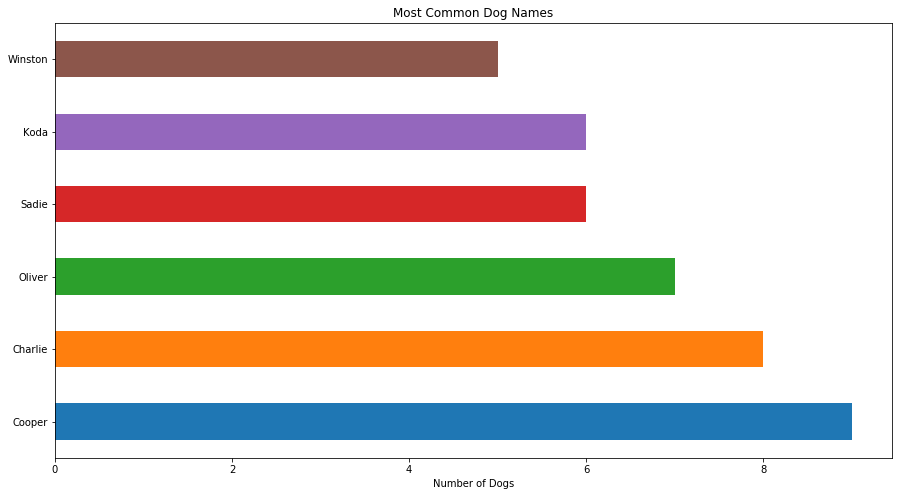

In [60]:
archive.name.value_counts()[0:6].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

### the correlation between retweet and favorite count

The Correlation Between retweet counts and favorite counts is  0.916518249405


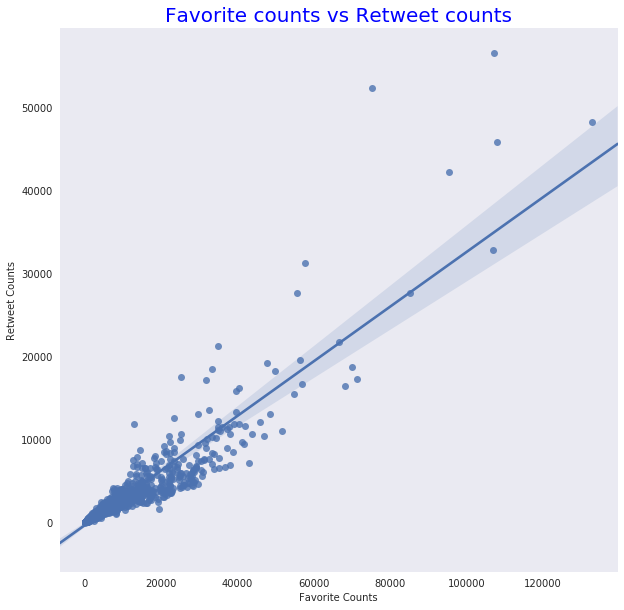

In [61]:
sns.set(rc={'figure.figsize':(10,10)}, style="dark")
sns.regplot(x='favorite_count', y='retweet_count', data=archive)

plt.title("Favorite counts vs Retweet counts",color="b", size=20)
plt.xlabel("Favorite Counts", size=10)
plt.ylabel("Retweet Counts", size=10)

corr= archive.corr()

print("The Correlation Between retweet counts and favorite counts is ",corr.loc['favorite_count','retweet_count']);